# EECS3401 - Group Project - Group 2 #
    
## CO2 emission prediction ##

### 1. Dataset acquisition ###

In [1]:
%pip install pandas
%pip install requests
%pip install scikit-learn
%pip install statsmodels
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import requests as rq
from io import StringIO

In [3]:
url = 'https://raw.githubusercontent.com/jewbe22/eecs3401-group2-groupProject/main/data/Fuel_Consumption_Ratings_2023.csv'
download = rq.get(url).content
co2_emission = pd.read_csv(StringIO(download.decode(errors='ignore')), sep=',', engine='python')
co2_emission

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,NaN,N = natural gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852,Fuel consumption,City and highway fuel consumption ratings are ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,CO2 emissions,the tailpipe emissions of carbon dioxide (in g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,CO2 rating,the tailpipe emissions of carbon dioxide rated...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
co2_emission.columns

Index(['Engine Size (L)', 'Cylinders', 'Fuel Type',
       'Fuel Consumption (L/100Km)', 'Hwy (L/100 km)', 'Comb (L/100 km)',
       'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

### 2. EDA ###

<class 'pandas.core.frame.DataFrame'>
Index: 833 entries, 0 to 832
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        833 non-null    object 
 1   Make                        833 non-null    object 
 2   Model                       833 non-null    object 
 3   Vehicle Class               833 non-null    object 
 4   Engine Size (L)             833 non-null    float64
 5   Cylinders                   833 non-null    float64
 6   Transmission                833 non-null    object 
 7   Fuel Type                   833 non-null    object 
 8   Fuel Consumption (L/100Km)  833 non-null    float64
 9   Hwy (L/100 km)              833 non-null    float64
 10  Comb (L/100 km)             833 non-null    float64
 11  Comb (mpg)                  833 non-null    float64
 12  CO2 Emissions (g/km)        833 non-null    float64
 13  CO2 Rating                  833 non-null

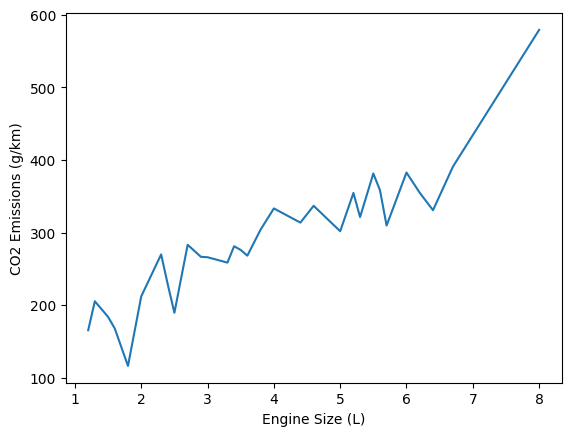

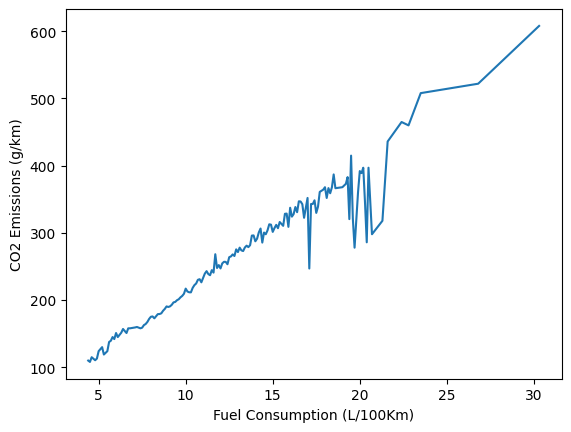

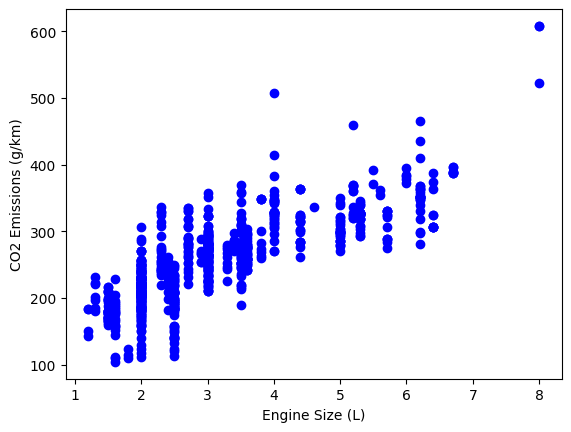

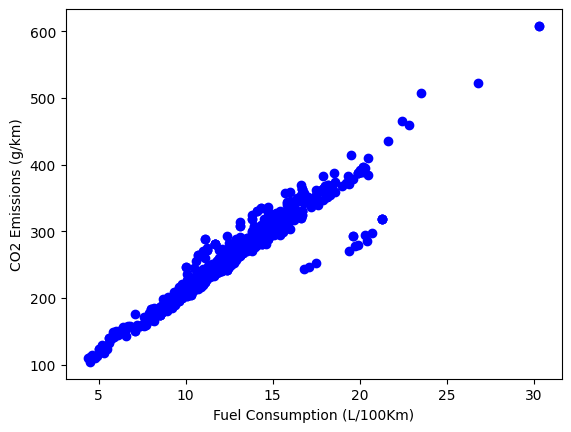

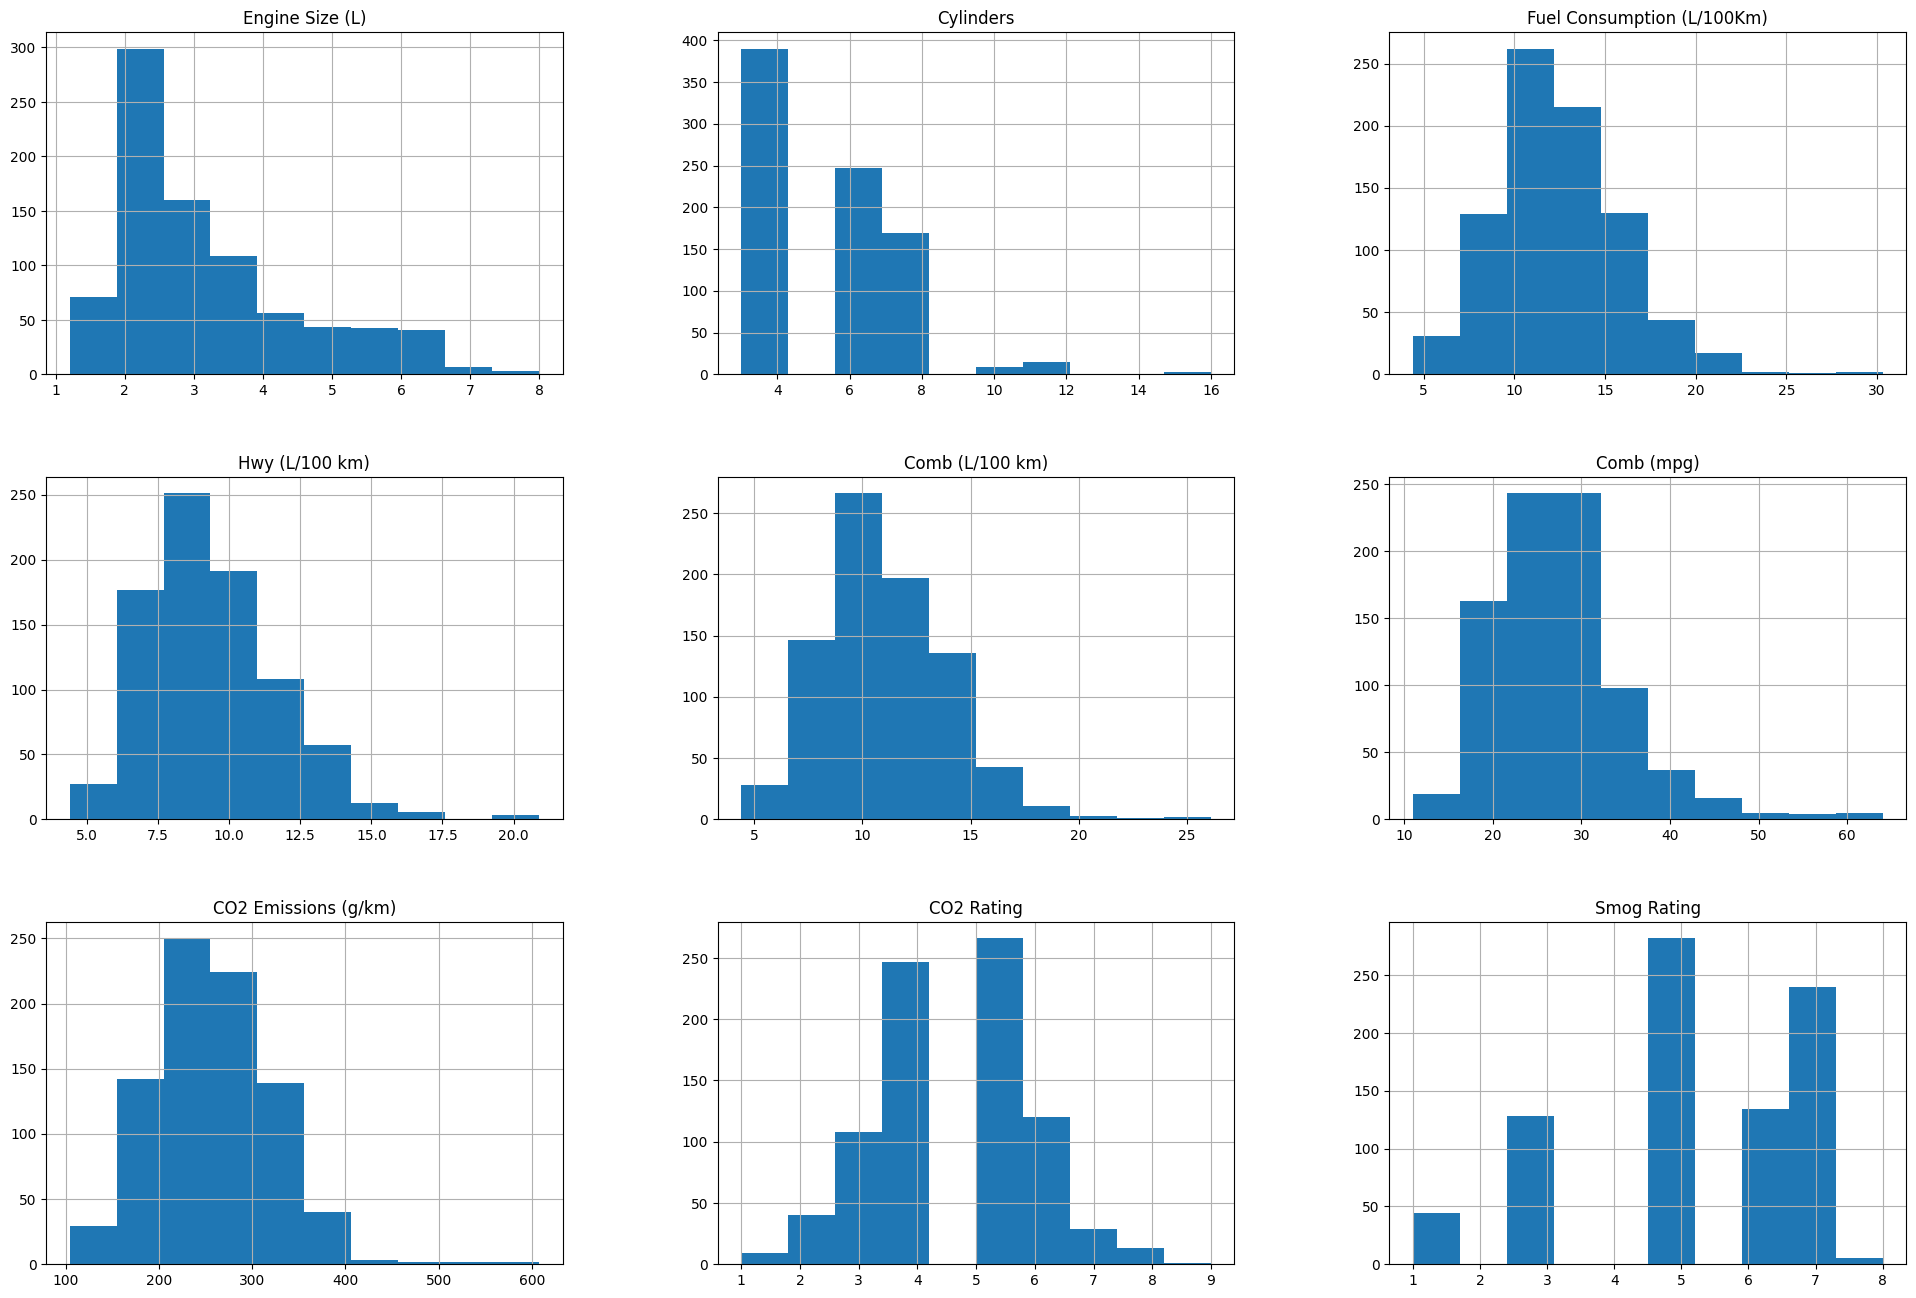

In [4]:
# todo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#rows 0-833 only contain the instances, the rest contain description of the features
co2_emission.isnull().sum()

#removing instances with null or dummy values
co2_emission.dropna(inplace=True)

co2_emission.describe()

#use this to analyze some trends i.e 75% of the average vehicle have < 3.6 engine sizes
co2_emission.info()
corr_matrix = co2_emission.corr(numeric_only=True)
corr_matrix
#finding correlations
corr_matrix["Engine Size (L)"].sort_values(ascending=False)

#correlation with respect to engine size
corr_matrix["Fuel Consumption (L/100Km)"].sort_values(ascending=False)

#correlation with respect to fuel consumption
g1 = sns.lineplot(x="Engine Size (L)", y="CO2 Emissions (g/km)", data=co2_emission, errorbar=None)
plt.show()
g2 = sns.lineplot(x="Fuel Consumption (L/100Km)", y="CO2 Emissions (g/km)", data=co2_emission, errorbar=None)
plt.show()


# Scatterplot of Engine Size vs CO2 Emissions
X1 = co2_emission["Engine Size (L)"]
y1 = co2_emission["CO2 Emissions (g/km)"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X1, y1, color = 'b')
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")



# Scatterplot of Fuel Consumption vs CO2 Emissions
X = co2_emission["Fuel Consumption (L/100Km)"]
y = co2_emission["CO2 Emissions (g/km)"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel("Fuel Consumption (L/100Km)")
plt.ylabel("CO2 Emissions (g/km)")
co2_emission.hist(figsize=(24, 16))
plt.show()

### 3. Data cleaning/Preprocessing ###

In [5]:
# todo

#removing irrelevant columns from the dataset
co2_emission=co2_emission.drop(['Transmission','Make','Year','Vehicle Class','Model','Comb (mpg)'],axis=1)

co2_emission.head()

,Engine Size (L),Cylinders,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,1.5,4.0,Z,7.9,6.3,7.2,167.0,6.0,7.0
1,1.5,4.0,Z,8.1,6.5,7.4,172.0,6.0,7.0
2,1.5,4.0,Z,8.9,6.5,7.8,181.0,6.0,6.0
3,3.5,6.0,Z,12.6,9.4,11.2,263.0,4.0,5.0
4,3.0,6.0,Z,13.8,11.2,12.4,291.0,4.0,5.0


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [7]:
num_cols = ['Engine Size (L)','Fuel Consumption (L/100Km)', 'Hwy (L/100 km)','Comb (L/100 km)'] 
# dtype of elements in cat_cols are numeric but actually they are categorical, and thus, they are subjects of oneHotEncoder()
cat_cols = ['Cylinders', 'Fuel Type', 'CO2 Rating', 'Smog Rating']



#create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

#use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

In [8]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Engine Size (L)',
                                  'Fuel Consumption (L/100Km)',
                                  'Hwy (L/100 km)', 'Comb (L/100 km)']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Cylinders', 'Fuel Type', 'CO2 Rating',
                                  'Smog Rating'])])

In [9]:
# Apply the preprocessing pipeline on the dataset

dataset_prepared = preprocessing.fit_transform(co2_emission)
feature_names=preprocessing.get_feature_names_out()
dataset_prepared



<833x31 sparse matrix of type '<class 'numpy.float64'>'
	with 7497 stored elements in Compressed Sparse Row format>

In [10]:

try:
    dataset_prepared = pd.DataFrame(data=dataset_prepared, columns=feature_names)
except:
    dataset_prepared = pd.DataFrame.sparse.from_spmatrix(data=dataset_prepared, columns=feature_names)

In [11]:
from sklearn.model_selection import train_test_split

X = dataset_prepared.drop(["remainder__CO2 Emissions (g/km)"], axis=1)
y = dataset_prepared["remainder__CO2 Emissions (g/km)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Model training ###

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score

RANDOM_STATE = 42

In [13]:
linear_model = LinearRegression()
linear_params = {
    'fit_intercept':[True, False],
    'copy_X':[True],
    'n_jobs':[None, 1, 2, 5, 10]
}

In [14]:
tree_model = DecisionTreeRegressor()
tree_params = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best','random'],
    'random_state':[RANDOM_STATE]    
}

In [15]:
elastic_model = ElasticNet()
elastic_params = {
    'alpha':[0.1, 0.3, 0.5, 1, 1.5],
    'l1_ratio':[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'max_iter':[ 500, 1000, 2000, 4000],
    'copy_X':[True],
    'positive':[True, False],
    'random_state':[RANDOM_STATE]
}

In [16]:

scoring_methods = ['neg_mean_absolute_error', 'neg_mean_squared_error','neg_root_mean_squared_error', 'r2']
K_FOLD = 3
SCORING_WITH = 'neg_mean_squared_error'

linear_best = GridSearchCV(linear_model, linear_params, scoring=scoring_methods, refit=SCORING_WITH, cv=K_FOLD)
tree_best = GridSearchCV(tree_model, tree_params, scoring=scoring_methods, refit=SCORING_WITH, cv=K_FOLD)
elastic_best = GridSearchCV(elastic_model, elastic_params, scoring=scoring_methods, refit=SCORING_WITH, cv=K_FOLD)


models = [('Linear regression',linear_best),
          ('Decision tree regressor',tree_best),
          ('Elastic net',elastic_best)]

cv_result = {}
temp = []
for (name, model) in models:
    model.fit(X_train, y_train)
    cv_result[name] = pd.DataFrame(cross_validate(model.best_estimator_, X_train, y_train, scoring=scoring_methods ,cv=K_FOLD))
    temp.append((name, model.best_estimator_))

# models becomes the list of algorithms with their best parameter set
models = temp

In [17]:
stat_columns = cv_result[models[0][0]].mean().index
statistic = pd.DataFrame(columns=stat_columns)
model_names = [models[i][0] for i in range(len(models))]
for model in model_names:
    statistic.loc[-1] = cv_result[model].mean()
    statistic.index = statistic.index + 1

statistic.index = model_names

In [18]:
# neg_mean_squared_error is used since it has a property such that the model is intuitively better when the score is greater
# unlike mean_squared_error
statistic.sort_values(by='test_' + SCORING_WITH, inplace=True, ascending=False)
statistic

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error,test_r2
Linear regression,0.014276,0.003193,-1.254465,-4.493234,-2.100258,0.998907
Elastic net,0.017397,0.003212,-3.725826,-51.532781,-7.138132,0.987833
Decision tree regressor,0.026929,0.003930,-2.699700,-93.240240,-8.449079,0.981417


### 5. Performance analysis ###

In [19]:
#source : https://www.dataquest.io/blog/learning-curves-machine-learning/
from sklearn.model_selection import learning_curve

In [20]:
train_size = np.arange(start=1, stop=int(X_train.shape[0] * float(1 - 1/K_FOLD)), step=10)

In [21]:
#finding the best estimator
best_estimator = None
for pair in models:
    if pair[0] == statistic.head(1).index:
        best_estimator = (pair[0], pair[1])
        break


In [22]:
# best_estimator == (name, model_object)
train_sizes, train_scores, validation_scores = learning_curve(estimator=best_estimator[1],
                                                              X=X_train, y=y_train, train_sizes=train_size, 
                                                              cv=K_FOLD, scoring=SCORING_WITH) 

In [23]:
# reverting the sign of the score into positive since neg_mean_squared_error is used for scoring
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

(-0.5, 20.0)

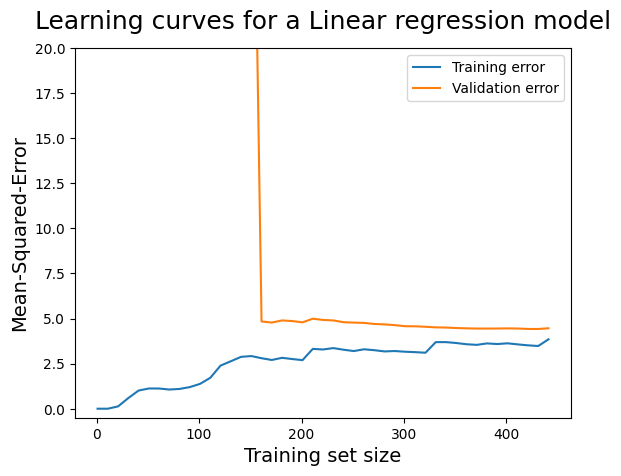

In [24]:

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Mean-Squared-Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title(f'Learning curves for a {best_estimator[0]} model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(-0.5, 20)

In [25]:
#source:https://medium.com/swlh/multi-linear-regression-using-python-44bd0d10082d
from statsmodels.stats.diagnostic import normal_ad
import statsmodels.api as sm

In [26]:
# OLS is a type of linear regression which has some useful extra attributes such as resid(==residual)
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)
olsmod = sm.OLS(y_train, X_train_ols).fit()
y_pred = olsmod.predict(X_test_ols)
residual = olsmod.resid


p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


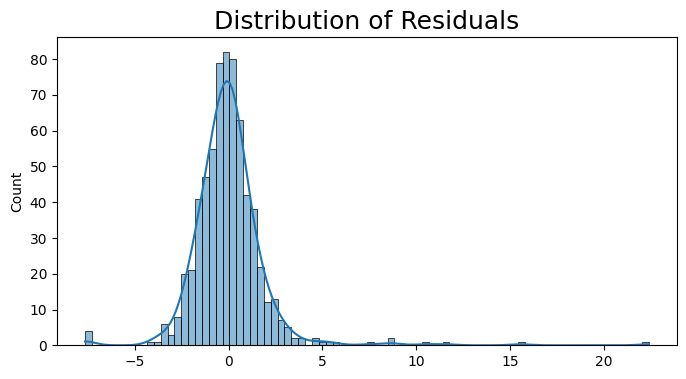

Residuals are not normally distributed


In [27]:
# Performing the test on the residuals
p_value = normal_ad(residual)[1]
print(f'p-value from the test Anderson-Darling test below 0.05 generally means non-normal: {p_value}')

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.histplot(data=residual, kde=True)
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

In [28]:
plot_columns = ['actual_CO2_emission','predicted_emission']
# to match the shape of y_test and y_pred
Y = pd.DataFrame(data=np.concatenate((np.reshape(a=y_test, newshape=(y_test.shape[0],1)), 
                                    np.reshape(a=y_pred, newshape=(y_pred.shape[0],1))), axis=1),columns=plot_columns)


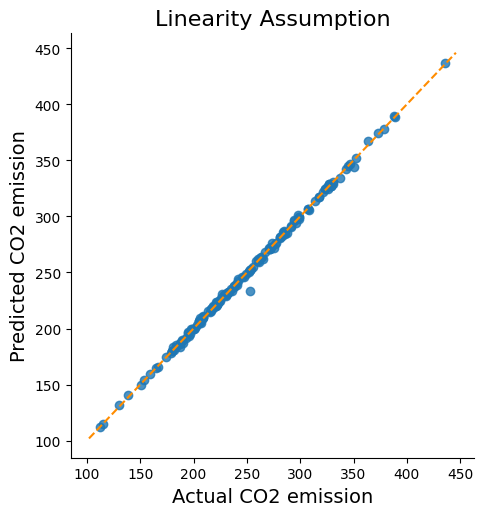

In [29]:
sns.lmplot(x=plot_columns[0], y=plot_columns[1], data=Y ,fit_reg=False)
    
# Plotting the diagonal line
line_coords = np.arange(start=Y[plot_columns].min().min()-10, 
                        stop=Y[plot_columns].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted CO2 emission', fontsize=14)
plt.xlabel('Actual CO2 emission', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)

plt.show()